# Logistic Regression

Logistic regression is a supervised machine learning algorithm used for **binary classification**. It predicts the **probability** of a data point belonging to a specific category, ranging from 0 to 1.

For example, logistic regression can predict if an incoming email is spam. If the predicted probability is greater than 0.5, the email is classified as spam. This is an example of binary classification (e.g., **spam** vs **not spam**).

#### Common Use Cases:

- **Disease identification**: Is a tumor malignant?
- **Customer conversion**: Will a customer sign up for a service?

Logistic regression provides a powerful way to make predictions and classifications based on probabilities.

Linear regression predicts outcomes across an infinite range, which isn't suitable for classification. Logistic regression solves this by applying the logit link function to the linear model:

$$ y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$

After applying the logit function:

$$ \ln\left(\frac{y}{1-y}\right) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$

This curve, called the **sigmoid function**, stays between 0 and 1, making it ideal for predicting probabilities in classification tasks.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


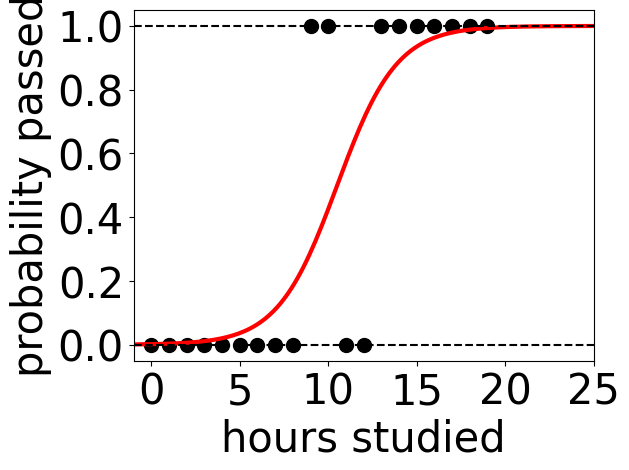

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

exams = pd.read_csv("../../../assets/csv/exam.csv")

# Fit the logistic regression model
hours_studied = exams[["hours_studied"]]
passed_exam = exams[["passed_exam"]]
model = LogisticRegression()
model.fit(hours_studied, passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1, 1)
probability = model.predict_proba(sample_x)[:, 1]

# Plot exam data
plt.scatter(hours_studied, passed_exam, color="black", s=100)

# Plot logistic curve
plt.plot(sample_x, probability, color="red", linewidth=3)

# Customization for readability
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axhline(y=0, color="k", linestyle="--")
plt.axhline(y=1, color="k", linestyle="--")

# Label plot and set limits
plt.ylabel("probability passed", fontsize=30)
plt.xlabel("hours studied", fontsize=30)
plt.xlim(-1, 25)
plt.tight_layout()

# Show the plot
plt.show()

## Linear Regression Approach

We fit a line to data using:

$$ y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$

Where:

- $y$: predicted value (pass/fail)
- $b_0$: intercept
- $b_1, b_2, \dots b_n$: coefficients
- $x_1, x_2, \dots x_n$: predictors (features)

In our case, $y$ is binary (1 for pass, 0 for fail) and the predictor is **num_hours_studied** ($x_1$).

Linear regression isn't ideal here since it predicts values outside of 0 and 1.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


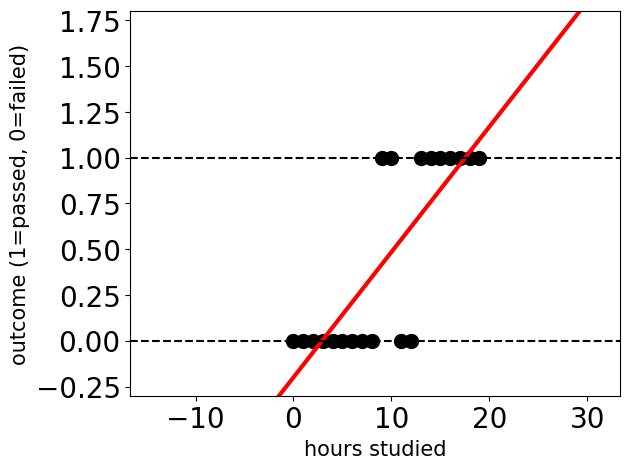

In [46]:
# Fit a linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(exams[["hours_studied"]], exams[["passed_exam"]])

# Get predictions from the linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1, 1)
predictions = model.predict(sample_x)

# Plot the data
plt.scatter(x="hours_studied", y="passed_exam", data=exams, color="black", s=100)

# Plot the line
plt.plot(sample_x, predictions, color="red", linewidth=3)

# Customization for readability
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=0, color="k", linestyle="--")
plt.axhline(y=1, color="k", linestyle="--")

# Label plot and set limits
plt.ylabel("outcome (1=passed, 0=failed)", fontsize=15)
plt.xlabel("hours studied", fontsize=15)
plt.xlim(-16.65, 33.35)
plt.ylim(-0.3, 1.8)

# Show the plot
plt.tight_layout()
plt.show()

## Log-Odds

The equation for a logistic regression model is:

$$ \ln\left(\frac{p}{1-p}\right) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$

Here, \( p \) represents the probability (e.g., of passing an exam). The left side, called **log-odds**, is the natural logarithm of the odds \( \frac{p}{1-p} \).

The **odds** of an event occurring are:

$$ \text{Odds} = \frac{p}{1-p} $$

For example, if the probability of passing is \( 0.7 \), then the odds are:

$$ \frac{0.7}{0.3} = 2.33 $$

This means the student is 2.33 times more likely to pass than fail. The **logit function** transforms probabilities (between 0 and 1) into log-odds (which range from negative to positive infinity).


In [47]:
# Suppose that there is a 40% probability of rain today (p = 0.4)
# Calculate the odds of rain
odds_of_rain = 0.4 / 0.6
print("odds of rain: ", odds_of_rain)

# Calculate log_odds_of_rain
log_odds_of_rain = np.log(0.4 / 0.6)
print("log odds of rain: ", log_odds_of_rain)

# Suppose that there is a 90% probability that my train to work arrives on-time.
# Calculate odds_on_time
odds_on_time = 0.9 / 0.1
print("odds of an on-time train: ", odds_on_time)

# Calculate log_odds_on_time
log_odds_on_time = np.log(0.9 / 0.1)
print("log odds of on-time train: ", log_odds_on_time)

odds of rain:  0.6666666666666667
log odds of rain:  -0.4054651081081643
odds of an on-time train:  9.0
log odds of on-time train:  2.1972245773362196


## Sigmoid Function

The equation for logistic regression is:

$$ \ln\left(\frac{p}{1-p}\right) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$

Here, \( p \) is the probability. The right-hand side produces **log-odds**.

To convert **log-odds** into probabilities, we use the **sigmoid function**:

$$ p = \frac{1}{1 + e^{-z}} $$

Where $z = b_0 + b_1 x_1 + \dots + b_n x_n$

This transformation squashes the output between 0 and 1, which makes it interpretable as a probability.

For example, if $ln\left(\frac{p}{1-p}\right) = -3.28$, we can calculate the probability:

$$ p = \frac{1}{1 + e^{-(-3.28)}} = 0.04 $$

The sigmoid function produces an S-shaped curve, ideal for classification tasks.


In [48]:
# Fit the logistic regression model
hours_studied = exams[["hours_studied"]]
passed_exam = exams[["passed_exam"]]
model = LogisticRegression()
model.fit(hours_studied, passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
print(log_odds)

# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds) / (1 + np.exp(log_odds))
print(pred_probability_passing)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    hours_studied
0       -6.236653
1       -5.643001
2       -5.049350
3       -4.455698
4       -3.862046
5       -3.268395
6       -2.674743
7       -2.081092
8       -1.487440
9       -0.893788
10      -0.300137
11       0.293515
12       0.887166
13       1.480818
14       2.074470
15       2.668121
16       3.261773
17       3.855425
18       4.449076
19       5.042728
    hours_studied
0        0.001953
1        0.003530
2        0.006373
3        0.011479
4        0.020592
5        0.036671
6        0.064480
7        0.110948
8        0.184306
9        0.290329
10       0.425524
11       0.572856
12       0.708305
13       0.814696
14       0.888397
15       0.935119
16       0.963094
17       0.979274
18       0.988446
19       0.993585


### Fitting a model in sklearn

Logistic regression is a classification algorithm that predicts the probability of a data point belonging to a class. After fitting the model, key attributes include the feature coefficients and intercept:

- Large positive coefficients increase the probability of the positive class.
- Large negative coefficients decrease it.
- A coefficient of 0 implies no relationship with the outcome.

Note: Standardizing features is important because of the default regularization in `sklearn`.


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

exams = pd.read_csv("../../../assets/csv/exam2.csv")

# Separate out X and y
X = exams[["hours_studied", "practice_test"]]
y = exams.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=27
)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)

[-0.13193653]
[[1.51032451 0.11984701]]


### Predictions in sklearn

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as 1) using the `.predict()` method. The input is a matrix of features and the output is a vector of predicted labels, `1` or `0`.


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=27
)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:, 1])

# Print out the true outcomes for the test data
print(y_test)

[0 1 0 1 1]
[0.32057642 0.79319025 0.05545606 0.57742889 0.87071045]
7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


## Classification Thresholding

In logistic regression, the classification threshold determines how probabilities are converted into class labels. By default, sklearn uses a threshold of 0.5:

- If the predicted probability ≥ 0.5, the datapoint is classified as 1 (positive class).
- If the probability < 0.5, the datapoint is classified as 0 (negative class).

You can adjust the threshold based on your needs. For example, lowering the threshold to 0.3 can increase sensitivity, which is useful for cases like cancer detection where missing a positive case is costly. This adjustment may result in more false positives but ensures fewer true positives are missed.


## Confusion matrix

A confusion matrix helps evaluate a model by showing the counts of true positives, false positives, true negatives, and false negatives.

For example, given:

- y_true = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
- y_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
  The confusion matrix:

[3, 2]\
[1, 4]

This matrix shows:

- True Negatives (TN): 3
- False Positives (FP): 2
- False Negatives (FN): 1
- True Positives (TP): 4

We aim for high values on the diagonal (TN and TP) to improve model performance.


In [51]:
from sklearn.metrics import confusion_matrix

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print("predicted classes: ", y_pred)

# Print out the true outcomes for the test data
print("true classes: ", y_test)

# Print out the confusion matrix here
print(confusion_matrix(y_test, y_pred))

predicted classes:  [0 1 0 1 1]
true classes:  7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64
[[2 1]
 [0 2]]


## Accuracy, Recall, Precision, F1 Score

Once we have a confusion matrix, there are a few different statistics we can use to summarize the four values in the matrix.

- Accuracy = (TP + TN)/(TP + FP + TN + FN)
- Precision = TP/(TP + FP)
- Recall = TP/(TP + FN)
- F1 score: weighted average of precision and recall


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print("predicted classes: ", y_pred)

# Print out the true outcomes for the test data
print("true classes: ", y_test)

# Print out the confusion matrix
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

# Print accuracy here:
print(accuracy_score(y_test, y_pred))

# Print F1 score here:
print(f1_score(y_test, y_pred))

predicted classes:  [0 1 0 1 1]
true classes:  7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64
confusion matrix: 
[[2 1]
 [0 2]]
0.8
0.8
